# Laplace Equation :

In [7]:
import matplotlib.pyplot as plt
import math as mth
import numpy as np
from matplotlib import cm
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.axes3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

We are going to solve $ \nabla^2 V = 0$ inside a square with boundary condition : $V = 10$ at all 4 boundaries

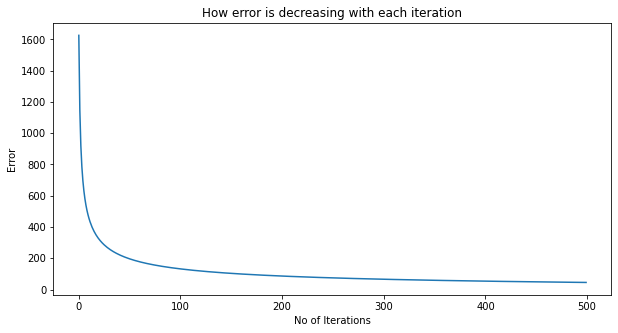

In [8]:
N = 100
iter = 500

v = np.zeros((N,N)) # initial guess values

# boundary conditions

v[:,0] = 10
v[:,N-1] = 10
v[0,:] = 10
v[N-1,:] = 10

E = []
Niter = range(iter)

for iter in Niter:
    v0 = v.copy()
    
    for i in range(1,N-1):
        for j in range(1,N-1):
            
            v[i,j] = 0.25*(v[i+1,j] + v[i-1,j] + v[i,j+1] + v[i,j-1])
            
    err = np.sum(np.abs(v-v0)) 
    E.append(err)
    
plt.title("How error is decreasing with each iteration")
plt.rcParams["figure.figsize"] = (10, 5)
plt.xlabel("No of Iterations")
plt.ylabel("Error")
plt.plot(Niter,E)

Now let's plot the solution:

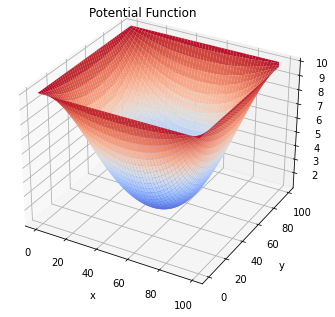

In [9]:
x = range(N)
y = range(N)
X,Y = np.meshgrid(x,y)
fig = plt.figure()
ax = plt.axes(projection = '3d')
ax.plot_surface(X, Y, v, cmap = cm.coolwarm)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V')
ax.set_title('Potential Function')

#scaling

scale_x = 1.15
scale_y = 1.15
scale_z = 1.15
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([scale_x, scale_y, scale_z, 1]))

#view angle

#ax.view_init(0,0)